In [1]:
import pandas as pd
from sklearn . tree import DecisionTreeClassifier
from sklearn . ensemble import RandomForestClassifier
from sklearn . model_selection import train_test_split ,cross_val_score
from sklearn . metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn . tree import plot_tree
from sklearn . preprocessing import LabelEncoder
from sklearn . metrics import accuracy_score
import matplotlib . pyplot as plt
import seaborn as sns

In [7]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv( url)
# Step 2: Select features and target
features = ['Pclass' , 'Sex', 'Age', 'Fare', 'Embarked']
df = df[ features + ['Survived']]
# Step 3: Handle missing values
df['Age']. fillna (df['Age']. median () , inplace = True )
df['Embarked' ]. fillna (df['Embarked']. mode () [0] , inplace = True )
# Step 4: Encode categorical features
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder ()
    df[ col] = le. fit_transform (df[ col ])
    label_encoders [col ] = le

C:\Users\OLINA\AppData\Local\Temp\ipykernel_8732\2745997780.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age']. fillna (df['Age']. median () , inplace = True )
C:\Users\OLINA\AppData\Local\Temp\ipykernel_8732\2745997780.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [9]:

# Step 5: Split features and target
X = df[ features ]
y = df['Survived']
X_train , X_test , y_train , y_test = train_test_split (X, y,
test_size =0.2 ,
random_state =42)
# Step 6: Train Decision Tree
dt_model = DecisionTreeClassifier ( random_state =42)
dt_model .fit( X_train , y_train )
dt_pred = dt_model . predict ( X_test )
dt_acc = accuracy_score (y_test , dt_pred )
dt_depth = dt_model . get_depth ()
print (f" --- Decision Tree ---")
print (f" Accuracy : { dt_acc :.2f}")
print (f" Tree Depth : { dt_depth }")
print (f" Leaves : { dt_model . get_n_leaves ()}")


 --- Decision Tree ---
 Accuracy : 0.77
 Tree Depth : 20
 Leaves : 176


In [13]:
rf_model = RandomForestClassifier ( n_estimators =100 , random_state =42)
rf_model .fit( X_train , y_train )
rf_pred = rf_model . predict ( X_test )
rf_acc = accuracy_score (y_test , rf_pred )
print (f"\n--- Random Forest ---")
print (f" Accuracy : { rf_acc :.2f}")
print (f" Number of Estimators : {len( rf_model . estimators_ )}")
print (f" Average Tree Depth : {sum ([t. get_depth () for t in rf_model.estimators_ ]) / 100:.2f}")
# Step 8: Cross - validation
from sklearn . model_selection import cross_val_score
cv_scores_dt = cross_val_score ( dt_model , X, y, cv =5)
cv_scores_rf = cross_val_score ( rf_model , X, y, cv =5)
print ("\n--- Cross - validation Results (5- fold ) ---")
print (f" Decision Tree CV Accuracy : { cv_scores_dt . mean () :.2f} +- {cv_scores_dt .std () :.2f}")
print (f" Random Forest CV Accuracy : { cv_scores_rf . mean () :.2f} +- {cv_scores_rf .std () :.2f}")
# Optional : Feature importance visualization ( Random Forest )
importances = pd. Series ( rf_model . feature_importances_ , index =features )


--- Random Forest ---
 Accuracy : 0.79
 Number of Estimators : 100
 Average Tree Depth : 17.20

--- Cross - validation Results (5- fold ) ---
 Decision Tree CV Accuracy : 0.78 +- 0.03
 Random Forest CV Accuracy : 0.81 +- 0.02


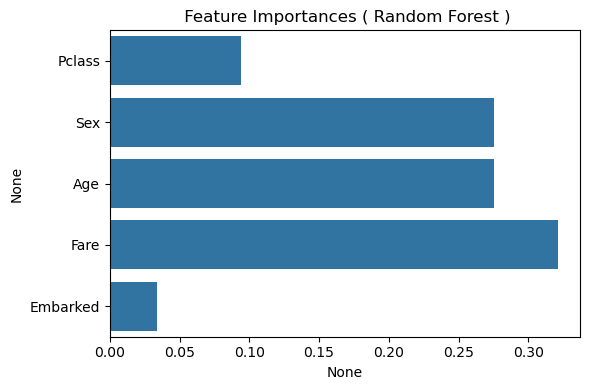

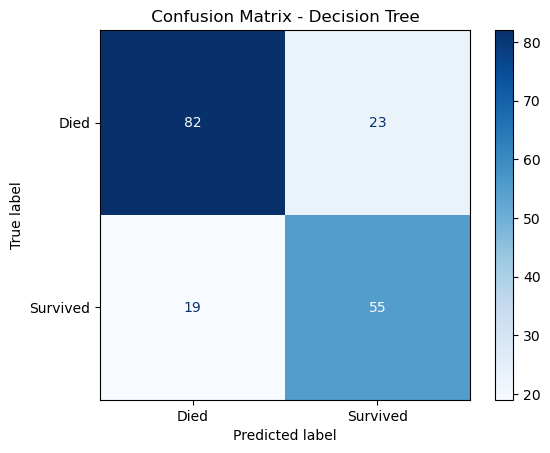

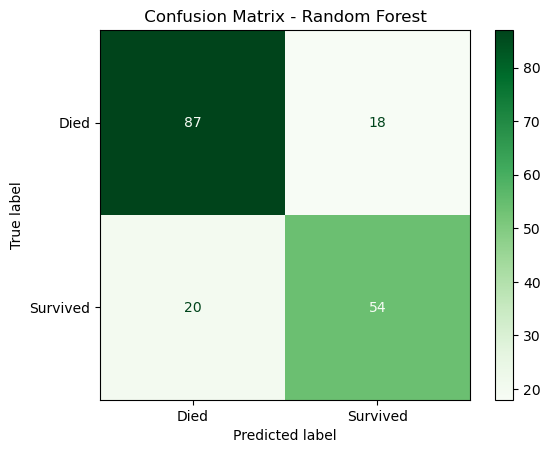

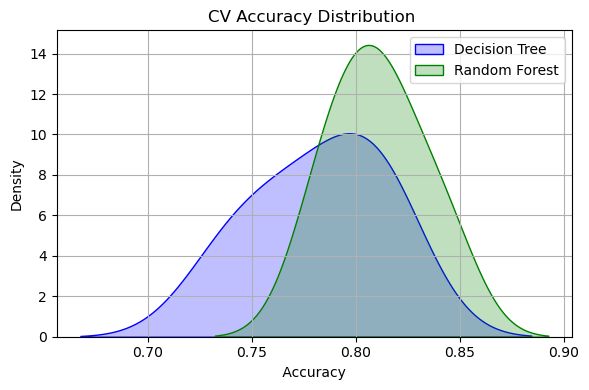

(array([ 7.,  1.,  2.,  5.,  6.,  2.,  1.,  9.,  8., 33.]),
 array([0.06 , 0.154, 0.248, 0.342, 0.436, 0.53 , 0.624, 0.718, 0.812,
        0.906, 1.   ]),
 <BarContainer object of 10 artists>)

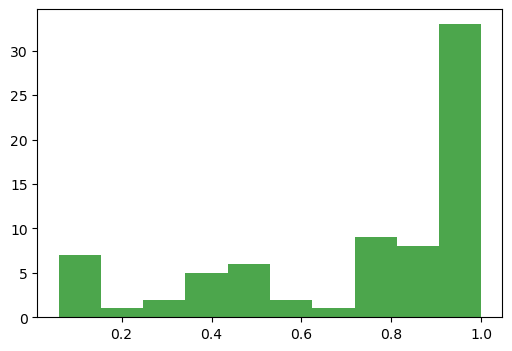

In [19]:
plt. figure ( figsize =(6 , 4))
sns. barplot (x= importances , y= importances . index )
plt. title (" Feature Importances ( Random Forest )")
plt. tight_layout ()
plt. savefig (" rf_feature_importance .png")
plt. show ()
# Plot 1: Confusion Matrix - Decision Tree
cm_dt = confusion_matrix (y_test , dt_pred )
disp_dt = ConfusionMatrixDisplay ( confusion_matrix =cm_dt ,
display_labels =[ 'Died' , 'Survived'])
disp_dt . plot ( cmap ='Blues')
plt. title (" Confusion Matrix - Decision Tree ")
plt. savefig (" confusion_matrix_dt.png")
plt. show ()
# Plot 2: Confusion Matrix - Random Forest
cm_rf = confusion_matrix (y_test , rf_pred )
disp_rf = ConfusionMatrixDisplay ( confusion_matrix =cm_rf ,
display_labels =[ 'Died', 'Survived'])
disp_rf . plot ( cmap ='Greens')
plt. title (" Confusion Matrix - Random Forest ")
plt. savefig (" confusion_matrix_rf .png")
plt. show ()
# Plot 3: Cross - Validation Accuracy Distribution
plt. figure ( figsize =(6 , 4))
sns. kdeplot ( cv_scores_dt , fill =True , label ='Decision Tree' , color ='blue')
sns. kdeplot ( cv_scores_rf , fill =True , label ='Random Forest' , color ='green')
plt. title ("CV Accuracy Distribution ")
plt. xlabel (" Accuracy ")
plt. legend ()
plt. grid ( True )
plt. tight_layout ()
plt. savefig (" cv_accuracy_distribution .png")
plt. show ()
# Plot 4: Predicted Probabilities Histogram - Random Forest
rf_probs = rf_model . predict_proba ( X_test )[:, 1] # Probabilities ofclass " Survived "
plt. figure ( figsize =(6 , 4))
plt. hist ( rf_probs [ y_test == 1], bins =10 , alpha =0.7 , label =" Survived ", color ='green')

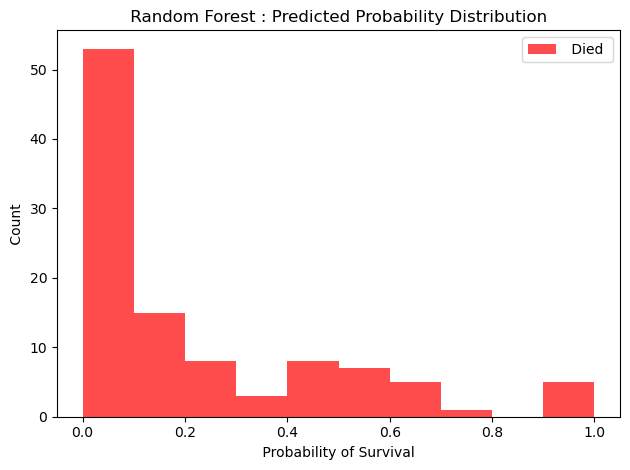

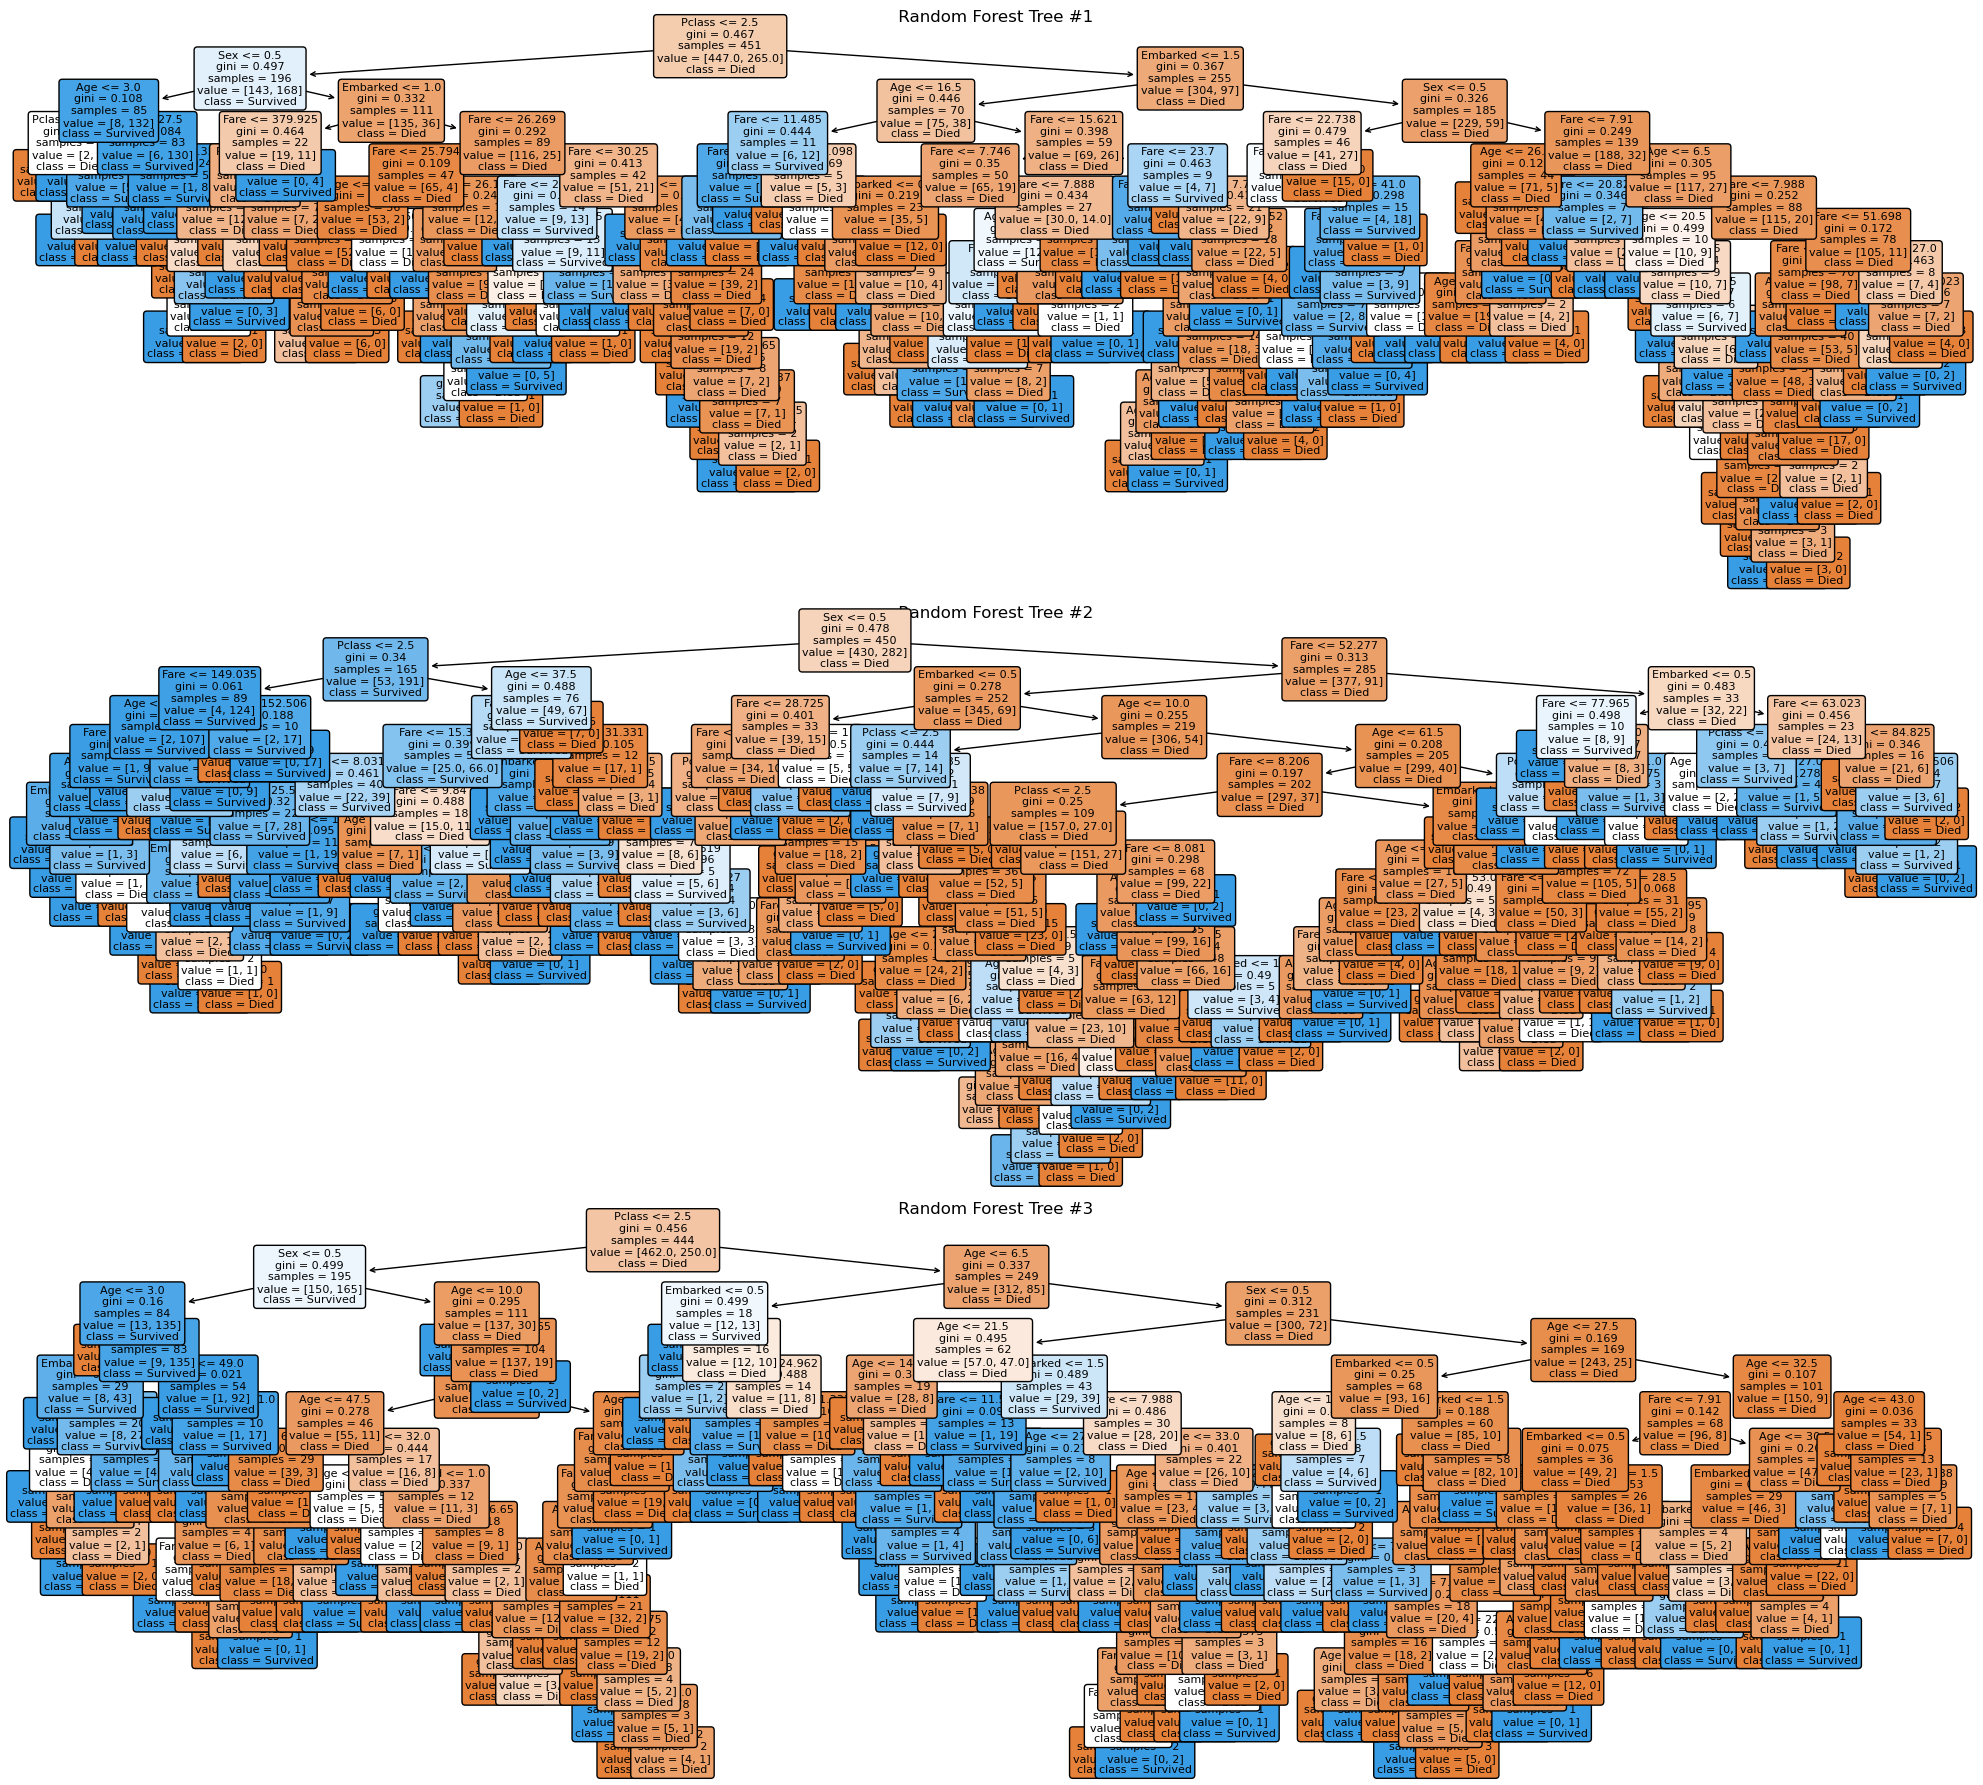

In [23]:
plt. hist ( rf_probs [ y_test == 0], bins =10 , alpha =0.7 , label =" Died ",color ='red')
plt. title (" Random Forest : Predicted Probability Distribution ")
plt. xlabel (" Probability of Survival ")
plt. ylabel (" Count ")
plt. legend ()
plt. tight_layout ()
plt. savefig (" rf_predicted_probabilities .png")
plt. show ()
# Plot a few individual decision trees from the Random Forest
n_samples = 3 # Number of trees to visualize
plt. figure ( figsize =(20 , 6 * n_samples ))
for i in range ( n_samples ):
    plt. subplot ( n_samples , 1, i + 1)
    plot_tree ( rf_model . estimators_ [i],
    feature_names = features ,
    class_names =[ 'Died', 'Survived'],
    filled =True ,
    rounded =True ,
    fontsize =8)
    plt. title (f" Random Forest Tree #{i+1}")
plt. tight_layout ()
plt. savefig (" random_forest_sample_trees.png")
plt. show ()